In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
import re
#from sklearn.impute import KNNImputer
import os

path=r'C:\Users\HP\Desktop\U\2 Semestre 2022\ML\Talleres\ml-fintech\\'

In [2]:
#descripción columnas
df_dc=pd.read_csv(path+"columns_description.csv")
df_dc

,Unnamed: 0,Table,Row,Description,Special
0,0,solicitud_{train/test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,1,solicitud_{train/test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,2,solicitud_{train/test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,3,solicitud_{train/test}.csv,CODE_GENDER,Gender of the client,NaN
4,4,solicitud_{train/test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
160,160,tarjeta_credito_movimientos.csv.csv,CNT_DRAWINGS_POS_CURRENT,Number of drawings for goods during this month...,NaN
161,161,tarjeta_credito_movimientos.csv.csv,CNT_INSTALMENT_MATURE_CUM,Number of paid installments on the previous cr...,NaN
162,162,tarjeta_credito_movimientos.csv.csv,NAME_CONTRACT_STATUS,"Contract status (active signed,...) on the pre...",NaN
163,163,tarjeta_credito_movimientos.csv.csv,SK_DPD,DPD (Days past due) during the month on the pr...,NaN


In [3]:
#historial_prestamos_movimientos
df_hpm=pd.read_csv(path+"historial_prestamos_movimientos.csv")
df_hpm


,Unnamed: 0,Unnamed: 0.1,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,0,0,5715448,0,C
1,1,1,5715448,-1,C
2,2,2,5715448,-2,C
3,3,3,5715448,-3,C
4,4,4,5715448,-4,C
...,...,...,...,...,...
10314562,14701607,27299920,5041336,-47,X
10314563,14701608,27299921,5041336,-48,X
10314564,14701609,27299922,5041336,-49,X
10314565,14701610,27299923,5041336,-50,X


In [4]:
df_hpm=df_hpm.iloc[:,2:].drop(columns='MONTHS_BALANCE')

In [5]:
df_hpm_d=df_hpm.drop_duplicates(subset='SK_ID_BUREAU', keep="first")
df_hpm_d

,SK_ID_BUREAU,STATUS
0,5715448,C
27,5715449,C
39,5715451,C
65,5715452,C
98,5715453,C
...,...,...
10314343,5041120,C
10314416,5041141,C
10314441,5041172,C
10314519,5041332,X


In [6]:
#historial_prestamos, selecciono los atributos que importan
df_hp=pd.read_csv(path+"historial_prestamos.csv")
df_hp=df_hp.iloc[:,2:]
df_hp

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025646,352790,5057718,Closed,currency 1,-1808,0,-1596.0,-1625.0,8100.0,0,28248.84,0.0,0.0,0.0,Consumer credit,-1625,NaN
1025647,352790,5057725,Closed,currency 1,-99,0,-83.0,-98.0,NaN,0,27000.00,0.0,0.0,0.0,Consumer credit,-18,NaN
1025648,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1025649,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [7]:
df_hp.isna().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE        61977
DAYS_ENDDATE_FACT         381761
AMT_CREDIT_MAX_OVERDUE    663895
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                 2
AMT_CREDIT_SUM_DEBT       156515
AMT_CREDIT_SUM_LIMIT      342424
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
AMT_ANNUITY               791360
dtype: int64

In [8]:
df_hpyhpm = pd.merge(df_hp,df_hpm_d,on='SK_ID_BUREAU', how='left')
df_hpyhpm

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,STATUS
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025646,352790,5057718,Closed,currency 1,-1808,0,-1596.0,-1625.0,8100.0,0,28248.84,0.0,0.0,0.0,Consumer credit,-1625,NaN,NaN
1025647,352790,5057725,Closed,currency 1,-99,0,-83.0,-98.0,NaN,0,27000.00,0.0,0.0,0.0,Consumer credit,-18,NaN,NaN
1025648,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN,NaN
1025649,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN,NaN


In [9]:
df_hp_d=df_hpyhpm.drop_duplicates(subset='SK_ID_CURR', keep="first")
df_hp_d

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,STATUS
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.000,NaN,0.0,Consumer credit,-131,NaN,NaN
7,238881,5714482,Closed,currency 1,-318,0,-187.0,-187.0,NaN,0,0.0,0.000,0.000,0.0,Credit card,-185,NaN,NaN
14,222183,5714491,Active,currency 1,-784,0,1008.0,NaN,0.0,0,0.0,-411.615,411.615,0.0,Credit card,-694,NaN,NaN
20,136226,5714502,Active,currency 1,-521,0,551.0,NaN,NaN,0,112500.0,0.000,0.000,0.0,Credit card,-30,NaN,NaN
22,400486,5714504,Closed,currency 1,-2413,0,-1864.0,-2128.0,NaN,0,180000.0,0.000,0.000,0.0,Consumer credit,-708,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024959,207190,5052629,Closed,currency 1,-532,0,45.0,-227.0,NaN,0,450000.0,0.000,0.000,0.0,Consumer credit,-31,NaN,C
1024995,324956,5054382,Closed,currency 1,-381,0,-199.0,-199.0,0.0,0,19800.0,0.000,0.000,0.0,Consumer credit,-199,0.0,C
1025066,448157,5043236,Active,currency 1,-1441,0,2197.0,NaN,NaN,0,1800000.0,1076809.500,0.000,0.0,Mortgage,-2,NaN,NaN
1025253,345866,5053303,Closed,currency 1,-375,0,-41.0,-19.0,NaN,0,175054.5,NaN,NaN,0.0,Consumer credit,-4,17140.5,C


In [10]:
#solicitudes train
df_strain=pd.read_csv(path+"solicitudes_train.csv")
df_strain

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,331475,0,Cash loans,F,Y,Y,0,135000.0,835380.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,366488,0,Cash loans,F,N,Y,0,103500.0,659533.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
2,2,444791,0,Cash loans,F,N,Y,0,135000.0,219042.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,112960,0,Revolving loans,F,N,Y,0,67500.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,9.0
4,4,418735,0,Revolving loans,F,N,Y,0,315000.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150674,150674,244356,0,Cash loans,M,N,Y,0,112500.0,112068.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
150675,150675,213955,0,Cash loans,F,N,Y,0,135000.0,781920.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
150676,150676,376877,0,Revolving loans,F,N,Y,0,135000.0,202500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
150677,150677,246747,0,Cash loans,F,N,N,1,135000.0,508495.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


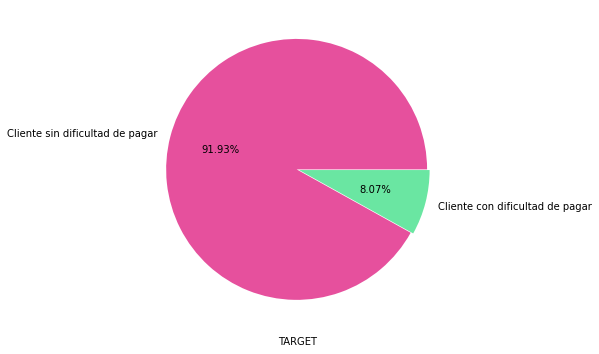

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,6))
colors=['#E6509D',"#6AE6A2"]
plt.pie(df_strain['TARGET'].value_counts(),labels=['Cliente sin dificultad de pagar','Cliente con dificultad de pagar'],autopct='%.2f%%',explode=[0.01,0.01],colors=colors);
plt.xlabel('TARGET');

In [12]:
df = pd.merge(df_strain,df_hp_d,on='SK_ID_CURR', how='left')
df

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,STATUS
0,0,331475,0,Cash loans,F,Y,Y,0,135000.0,835380.0,...,NaN,0.0,1039500.00,0.0,NaN,0.0,Consumer credit,-14.0,NaN,NaN
1,1,366488,0,Cash loans,F,N,Y,0,103500.0,659533.5,...,0.000,0.0,19089.00,0.0,0.0,0.0,Consumer credit,-2706.0,NaN,NaN
2,2,444791,0,Cash loans,F,N,Y,0,135000.0,219042.0,...,NaN,0.0,180000.00,0.0,NaN,0.0,Credit card,-837.0,NaN,NaN
3,3,112960,0,Revolving loans,F,N,Y,0,67500.0,675000.0,...,5224.545,0.0,66668.40,0.0,0.0,0.0,Consumer credit,-631.0,NaN,NaN
4,4,418735,0,Revolving loans,F,N,Y,0,315000.0,900000.0,...,0.000,0.0,85725.00,0.0,0.0,0.0,Consumer credit,-2681.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150674,150674,244356,0,Cash loans,M,N,Y,0,112500.0,112068.0,...,NaN,0.0,225000.00,0.0,0.0,0.0,Consumer credit,-315.0,0.0,C
150675,150675,213955,0,Cash loans,F,N,Y,0,135000.0,781920.0,...,0.000,0.0,22500.00,22500.0,0.0,0.0,Microloan,-10.0,12285.0,0
150676,150676,376877,0,Revolving loans,F,N,Y,0,135000.0,202500.0,...,NaN,0.0,225000.00,72823.5,0.0,0.0,Credit card,-1548.0,NaN,NaN
150677,150677,246747,0,Cash loans,F,N,N,1,135000.0,508495.5,...,0.000,0.0,0.00,0.0,0.0,0.0,Credit card,-11.0,NaN,X


In [13]:
df_train=df.iloc[:,1:]
df_train=df_train.drop(columns=['SK_ID_CURR','SK_ID_BUREAU'])
df_train

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,...,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,STATUS
0,0,Cash loans,F,Y,Y,0,135000.0,835380.0,30955.5,675000.0,...,NaN,0.0,1039500.00,0.0,NaN,0.0,Consumer credit,-14.0,NaN,NaN
1,0,Cash loans,F,N,Y,0,103500.0,659533.5,26284.5,589500.0,...,0.000,0.0,19089.00,0.0,0.0,0.0,Consumer credit,-2706.0,NaN,NaN
2,0,Cash loans,F,N,Y,0,135000.0,219042.0,23130.0,193500.0,...,NaN,0.0,180000.00,0.0,NaN,0.0,Credit card,-837.0,NaN,NaN
3,0,Revolving loans,F,N,Y,0,67500.0,675000.0,33750.0,675000.0,...,5224.545,0.0,66668.40,0.0,0.0,0.0,Consumer credit,-631.0,NaN,NaN
4,0,Revolving loans,F,N,Y,0,315000.0,900000.0,45000.0,900000.0,...,0.000,0.0,85725.00,0.0,0.0,0.0,Consumer credit,-2681.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150674,0,Cash loans,M,N,Y,0,112500.0,112068.0,11610.0,99000.0,...,NaN,0.0,225000.00,0.0,0.0,0.0,Consumer credit,-315.0,0.0,C
150675,0,Cash loans,F,N,Y,0,135000.0,781920.0,32998.5,675000.0,...,0.000,0.0,22500.00,22500.0,0.0,0.0,Microloan,-10.0,12285.0,0
150676,0,Revolving loans,F,N,Y,0,135000.0,202500.0,10125.0,202500.0,...,NaN,0.0,225000.00,72823.5,0.0,0.0,Credit card,-1548.0,NaN,NaN
150677,0,Cash loans,F,N,N,1,135000.0,508495.5,21541.5,454500.0,...,0.000,0.0,0.00,0.0,0.0,0.0,Credit card,-11.0,NaN,X


In [14]:
categorical = [var for var in df_train.columns if df_train[var].dtype=='O']
categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'CREDIT_TYPE',
 'STATUS']

In [15]:
numerical = [var for var in df_train.columns if df_train[var].dtype!='O']
numerical

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'Y

In [16]:
train_c=df_train[categorical]
train_n=df_train[numerical]
#train_n=train_n.drop(columns='TARGET')

In [17]:
train_c

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE,STATUS
0,Cash loans,F,Y,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,FRIDAY,XNA,NaN,NaN,NaN,NaN,Active,currency 1,Consumer credit,NaN
1,Cash loans,F,N,Y,Family,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN,Closed,currency 1,Consumer credit,NaN
2,Cash loans,F,N,Y,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,NaN,MONDAY,Business Entity Type 3,NaN,NaN,NaN,No,Closed,currency 1,Credit card,NaN
3,Revolving loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,MONDAY,Restaurant,NaN,block of flats,Block,No,Closed,currency 1,Consumer credit,NaN
4,Revolving loans,F,N,Y,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,NaN,FRIDAY,XNA,NaN,block of flats,"Stone, brick",No,Closed,currency 1,Consumer credit,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150674,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,SATURDAY,Business Entity Type 3,NaN,NaN,NaN,NaN,Closed,currency 1,Consumer credit,C
150675,Cash loans,F,N,Y,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,NaN,FRIDAY,Medicine,NaN,block of flats,"Stone, brick",No,Active,currency 1,Microloan,0
150676,Revolving loans,F,N,Y,Family,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,MONDAY,XNA,NaN,NaN,NaN,NaN,Active,currency 1,Credit card,NaN
150677,Cash loans,F,N,N,Unaccompanied,Working,Higher education,Married,House / apartment,Core staff,MONDAY,Government,NaN,block of flats,Panel,No,Closed,currency 1,Credit card,X


In [18]:
train_c.isna().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                  631
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                47367
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            102975
HOUSETYPE_MODE                 75586
WALLSMATERIAL_MODE             76535
EMERGENCYSTATE_MODE            71405
CREDIT_ACTIVE                  21638
CREDIT_CURRENCY                21638
CREDIT_TYPE                    21638
STATUS                        105445
dtype: int64

In [19]:
train_c=train_c.fillna(train_c.mode().iloc[0])

In [20]:
train_c.isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
CREDIT_ACTIVE                 0
CREDIT_CURRENCY               0
CREDIT_TYPE                   0
STATUS                        0
dtype: int64

In [21]:
train_n.isna().sum()

TARGET                         0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY_x                  5
                           ...  
AMT_CREDIT_SUM_DEBT        32192
AMT_CREDIT_SUM_LIMIT       54775
AMT_CREDIT_SUM_OVERDUE     21638
DAYS_CREDIT_UPDATE         21638
AMT_ANNUITY_y             122209
Length: 117, dtype: int64

In [22]:
train_n=train_n.fillna(train_n.mean().iloc[0])

In [23]:
train_n.isna().sum()

TARGET                    0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY_x             0
                         ..
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY_y             0
Length: 117, dtype: int64

In [24]:
scaler = StandardScaler()
target =df_train['TARGET']
train_n[:] = scaler.fit_transform(train_n)
train_n.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,-0.29634,-0.576313,-0.301564,0.587869,0.263743,0.370435,-1.059226,-0.642414,2.129407,-1.854951,...,0.298458,0.801644,-0.021651,-0.211962,0.544462,-0.143682,-0.082576,-0.005387,0.726989,-0.061015
1,-0.29634,-0.576313,-0.588114,0.149959,-0.058781,0.138740,-0.144653,-1.239540,2.129407,0.480197,...,-0.636037,-2.527346,-0.021653,-0.211962,-0.182784,-0.143682,-0.082578,-0.005387,-2.821265,-0.061015
2,-0.29634,-0.576313,-0.301564,-0.946995,-0.276594,-0.934374,-1.075535,0.756536,-0.467982,1.083465,...,-0.244179,-0.228123,-0.021651,-0.211962,-0.068103,-0.143682,-0.082576,-0.005387,-0.357786,-0.061015
3,-0.29634,-0.576313,-0.915599,0.188475,0.456698,0.370435,-0.083836,-0.915648,-0.481831,-1.699387,...,-0.204422,0.017915,0.101074,-0.211962,-0.148874,-0.143682,-0.082578,-0.005387,-0.086263,-0.061015
4,-0.29634,-0.576313,1.335864,0.748792,1.233491,0.980159,-0.775510,-1.321831,2.129407,0.667780,...,-0.630750,-2.496591,-0.021653,-0.211962,-0.135293,-0.143682,-0.082578,-0.005387,-2.788313,-0.061015


In [25]:
#hacer con cada categorical
train_c=pd.get_dummies(data=train_c)
train = pd.concat([train_n,train_c], axis=1)
train=train.reindex(sorted(train.columns), axis=1)
train

,AMT_ANNUITY_x,AMT_ANNUITY_y,AMT_CREDIT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,...,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,0.263743,-0.061015,0.587869,-0.021651,0.544462,-0.143682,-0.082576,-0.005387,0.370435,-0.301564,...,0,0,0,0,-1.020473,-1.020395,-1.019760,-0.695760,-0.696189,-0.696842
1,-0.058781,-0.061015,0.149959,-0.021653,-0.182784,-0.143682,-0.082578,-0.005387,0.138740,-0.588114,...,0,0,0,1,-1.020473,-1.020395,-1.019760,-0.695760,-0.696189,-0.696842
2,-0.276594,-0.061015,-0.946995,-0.021651,-0.068103,-0.143682,-0.082576,-0.005387,-0.934374,-0.301564,...,0,0,0,0,0.970902,0.970742,0.971759,-0.695760,-0.696189,-0.696842
3,0.456698,-0.061015,0.188475,0.101074,-0.148874,-0.143682,-0.082578,-0.005387,0.370435,-0.915599,...,0,0,0,0,0.976453,0.969632,0.962877,-0.695760,-0.696189,-0.696842
4,1.233491,-0.061015,0.748792,-0.021653,-0.135293,-0.143682,-0.082578,-0.005387,0.980159,1.335864,...,0,0,0,0,1.009536,1.009372,1.010169,-0.695760,-0.696189,-0.696842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150674,-1.072030,-0.061017,-1.213391,-0.021651,-0.036031,-0.143682,-0.082578,-0.005387,-1.190458,-0.506242,...,0,0,0,0,-1.020473,-1.020395,-1.019760,-0.695760,-0.696189,-0.696842
150675,0.404808,0.201884,0.454738,-0.021653,-0.180353,-0.105766,-0.082578,-0.005387,0.370435,-0.301564,...,0,0,0,0,0.988664,0.988503,0.989299,-0.695760,-0.696189,-0.696842
150676,-1.174566,-0.061015,-0.988189,-0.021651,-0.036031,-0.020962,-0.082578,-0.005387,-0.909985,-0.301564,...,0,0,0,0,-1.020473,-1.020395,-1.019760,-0.695760,-0.696189,-0.696842
150677,-0.386277,-0.061015,-0.226170,-0.021653,-0.196389,-0.143682,-0.082578,-0.005387,-0.227094,-0.301564,...,0,0,0,0,1.001987,1.001823,1.002620,-0.695760,-0.696189,-0.696842


In [26]:
X = train.drop(columns='TARGET')
y = target

In [27]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
parameters_lr = [{'solver': ['newton-cg', 'lbfgs', 'liblinear']},
                {'penalty':['none', 'elasticnet', 'l1', 'l2']},
                {'C':[0.01, 0.1, 1, 10]}]

              #,
              #{'dual':[True,False]},
              #{'max_iter':[100,200,300,400,500]},
              #{'tol':[1e-4,1e-5,1e-6]}


lr = LogisticRegression(random_state=0,class_weight='balanced')


grid_searchlr = GridSearchCV(estimator = lr,
                           param_grid = parameters_lr,
                           scoring = 'roc_auc',
                           verbose=0)
grid_searchlr.fit(X, y)
print(grid_searchlr.best_estimator_)
print(grid_searchlr.best_score_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validati

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')
0.7336718125994548


In [40]:
grid_searchlr.best_estimator_

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [41]:
grid_searchlr.best_score_

0.7336718125994548

In [37]:
#Grilla para perceptron
parameters_per = [{'penalty':['none', 'elasticnet', 'l1', 'l2']},
                  {'alpha':[0.001, 0.01, 0.1, 1, 10]},
                  {'max_iter':[100,1000,1500]},
                  {'tol':[1e-5,1e-4,1e-3]}]

per = Perceptron(random_state=0)

grid_searchper = GridSearchCV(estimator = per,
                           param_grid = parameters_per,
                           scoring = 'roc_auc',
                           verbose=0)

grid_searchper.fit(X, y)

GridSearchCV(estimator=Perceptron(),
             param_grid=[{'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'alpha': [0.001, 0.01, 0.1, 1, 10]},
                         {'max_iter': [100, 1000, 1500]},
                         {'tol': [1e-05, 0.0001, 0.001]}],
             scoring='roc_auc')

In [38]:
grid_searchper.best_estimator_

Perceptron(penalty='elasticnet')

In [39]:
grid_searchper.best_score_

0.6231433486159519

In [43]:
clf = LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear').fit(X_train,y_train)
score_roc = roc_auc_score(y_test, clf.predict(X_test))
score_roc

0.6738341453151007

In [44]:
confusion_matrix(y_test, clf.predict(X_test))

array([[23393, 11200],
       [ 1011,  2066]], dtype=int64)

In [46]:
clf=Perceptron(penalty='elasticnet').fit(X_train,y_train)
score = roc_auc_score(y_test, clf.predict(X_test))
score

0.5066592848519635

In [47]:
confusion_matrix(y_test, clf.predict(X_test))

array([[33907,   686],
       [ 2975,   102]], dtype=int64)

TEST

In [48]:
#solicitudes test
df_stest=pd.read_csv(path+"solicitudes_test.csv")
df_stest

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,251482,Cash loans,M,Y,Y,1,247500.0,338832.0,17869.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1,1,152322,Cash loans,F,Y,Y,0,157500.0,566055.0,16681.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,2,213864,Cash loans,F,Y,N,0,225000.0,1024740.0,52452.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
3,3,149195,Cash loans,M,Y,Y,1,90000.0,1078200.0,31653.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,215443,Cash loans,F,N,Y,0,81000.0,269550.0,12964.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64573,64573,449354,Cash loans,F,N,Y,0,157500.0,808650.0,29709.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
64574,64574,118433,Cash loans,M,N,Y,0,540000.0,306000.0,11664.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
64575,64575,177671,Cash loans,F,N,N,0,112500.0,454500.0,19107.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
64576,64576,449847,Cash loans,F,N,Y,0,112500.0,805882.5,25434.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0


In [49]:
df_t = pd.merge(df_stest,df_hp_d,on='SK_ID_CURR', how='left')
df_t

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,STATUS
0,0,251482,Cash loans,M,Y,Y,1,247500.0,338832.0,17869.5,...,0.0,0.0,180000.00,0.00,0.0,0.0,Credit card,-1442.0,NaN,NaN
1,1,152322,Cash loans,F,Y,Y,0,157500.0,566055.0,16681.5,...,NaN,0.0,628200.00,436605.84,NaN,0.0,Consumer credit,-10.0,NaN,NaN
2,2,213864,Cash loans,F,Y,N,0,225000.0,1024740.0,52452.0,...,NaN,0.0,540000.00,0.00,0.0,0.0,Consumer credit,-913.0,15966.0,0
3,3,149195,Cash loans,M,Y,Y,1,90000.0,1078200.0,31653.0,...,NaN,0.0,270000.00,18666.00,0.0,0.0,Credit card,-27.0,NaN,NaN
4,4,215443,Cash loans,F,N,Y,0,81000.0,269550.0,12964.5,...,NaN,0.0,71760.24,0.00,NaN,0.0,Consumer credit,-336.0,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64573,64573,449354,Cash loans,F,N,Y,0,157500.0,808650.0,29709.0,...,0.0,0.0,52395.75,360.00,0.0,0.0,Consumer credit,-1546.0,NaN,NaN
64574,64574,118433,Cash loans,M,N,Y,0,540000.0,306000.0,11664.0,...,0.0,0.0,270000.00,0.00,0.0,0.0,Credit card,-486.0,NaN,NaN
64575,64575,177671,Cash loans,F,N,N,0,112500.0,454500.0,19107.0,...,NaN,0.0,251550.00,225648.00,0.0,0.0,Consumer credit,-58.0,NaN,NaN
64576,64576,449847,Cash loans,F,N,Y,0,112500.0,805882.5,25434.0,...,0.0,0.0,193500.00,0.00,0.0,0.0,Consumer credit,-883.0,NaN,NaN


In [50]:
df_test=df_t.iloc[:,1:]
df_test=df_test.drop(columns=['SK_ID_CURR','SK_ID_BUREAU'])
numerical = [var for var in df_test.columns if df_test[var].dtype!='O']
test_c=df_test[categorical]
test_n=df_test[numerical]

In [51]:
test_c.isna().sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                 263
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               20179
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
FONDKAPREMONT_MODE            44130
HOUSETYPE_MODE                32398
WALLSMATERIAL_MODE            32839
EMERGENCYSTATE_MODE           30569
CREDIT_ACTIVE                  9268
CREDIT_CURRENCY                9268
CREDIT_TYPE                    9268
STATUS                        45320
dtype: int64

In [52]:
test_c=test_c.fillna(train_c.mode().iloc[0])
test_c.isna().sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                 263
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               20179
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
FONDKAPREMONT_MODE            44130
HOUSETYPE_MODE                32398
WALLSMATERIAL_MODE            32839
EMERGENCYSTATE_MODE           30569
CREDIT_ACTIVE                  9268
CREDIT_CURRENCY                9268
CREDIT_TYPE                    9268
STATUS                        45320
dtype: int64

In [53]:
train_c.mode().iloc[0]

NAME_CONTRACT_TYPE_Cash loans         1
NAME_CONTRACT_TYPE_Revolving loans    0
CODE_GENDER_F                         1
CODE_GENDER_M                         0
CODE_GENDER_XNA                       0
                                     ..
STATUS_3                              0
STATUS_4                              0
STATUS_5                              0
STATUS_C                              1
STATUS_X                              0
Name: 0, Length: 165, dtype: uint8

In [54]:
test_n.isna().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY_x                 2
AMT_GOODS_PRICE              47
                          ...  
AMT_CREDIT_SUM_DEBT       13851
AMT_CREDIT_SUM_LIMIT      23580
AMT_CREDIT_SUM_OVERDUE     9268
DAYS_CREDIT_UPDATE         9268
AMT_ANNUITY_y             52530
Length: 116, dtype: int64

In [55]:
test_n=test_n.fillna(train_n.mean().iloc[0])
test_n.isna().sum()

CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY_x             0
AMT_GOODS_PRICE           0
                         ..
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY_y             0
Length: 116, dtype: int64

In [56]:
scaler = StandardScaler()
test_n[:] = scaler.fit_transform(test_n)
test_c=pd.get_dummies(data=test_c)
test = pd.concat([test_n,test_c], axis=1)
[x for x in train.columns.tolist() if x not in test.columns.tolist()]

['CODE_GENDER_XNA',
 'CREDIT_TYPE_Real estate loan',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_INCOME_TYPE_Maternity leave',
 'STATUS_3',
 'STATUS_4',
 'TARGET']

In [57]:
[x for x in test.columns.tolist() if x not in X.columns.tolist()]

['CREDIT_ACTIVE_Bad debt']

In [58]:
#Agregamos y quitamos las columnas extras por dummys
test['CODE_GENDER_XNA']=0

test['CREDIT_TYPE_Real estate loan']=0

test['NAME_FAMILY_STATUS_Unknown']=0

test['NAME_INCOME_TYPE_Maternity leave']=0

test['STATUS_3']=0

test['STATUS_4']=0

test=test.drop(columns='CREDIT_ACTIVE_Bad debt')


test=test.reindex(sorted(test.columns), axis=1)
test

,AMT_ANNUITY_x,AMT_ANNUITY_y,AMT_CREDIT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,...,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,-0.635747,-0.016220,-0.645976,-0.017473,-0.105923,-0.142694,-0.087196,-0.008078,-0.663910,0.162293,...,0,0,0,1,-1.021619,-1.021525,-1.020816,-0.698201,-0.698570,-0.699053
1,-0.717379,-0.016220,-0.082193,-0.017473,0.397160,0.588358,-0.087196,-0.008078,-0.176817,-0.028458,...,0,0,0,0,-1.021619,-1.021525,-1.020816,-0.698201,-0.698570,-0.699053
2,1.740543,0.057381,1.055892,-0.017473,0.298160,-0.142694,-0.087196,-0.008078,0.980029,0.114605,...,0,0,1,0,0.975511,0.975414,0.976196,1.301282,1.303429,1.313519
3,0.311368,-0.016220,1.188537,-0.017473,-0.004902,-0.111440,-0.087196,-0.008078,0.980029,-0.171522,...,0,1,0,0,-1.021619,-1.021525,-1.020816,-0.698201,-0.698570,-0.699053
4,-0.972787,-0.016220,-0.817878,-0.017473,-0.227417,-0.142694,-0.087196,-0.008078,-0.846570,-0.190597,...,0,0,1,0,-1.021619,-1.021525,-1.020816,-0.698201,-0.698570,-0.699053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64573,0.177788,-0.016220,0.519732,-0.017473,-0.249153,-0.142091,-0.087196,-0.008078,0.371163,-0.028458,...,0,0,0,0,0.981628,0.981529,0.982312,-0.698201,-0.698570,-0.699053
64574,-1.062149,-0.016220,-0.727439,-0.017473,-0.004902,-0.142694,-0.087196,-0.008078,-0.627378,0.782235,...,0,0,0,1,0.973473,0.973375,0.974157,1.263577,1.266421,1.277507
64575,-0.550714,-0.016220,-0.358982,-0.017473,-0.025611,0.235130,-0.087196,-0.008078,-0.225526,-0.123834,...,0,1,0,0,-1.021619,-1.021525,-1.020816,-0.698201,-0.698570,-0.699053
64576,-0.115962,-0.016220,0.512865,-0.017473,-0.090770,-0.142694,-0.087196,-0.008078,0.200680,-0.123834,...,0,0,0,0,0.965522,0.965425,0.966207,-0.698201,-0.698570,-0.699053


In [59]:
#Usamos el modelo que mejor roc_auc obtuvo
clf=LogisticRegression(random_state=0,class_weight= 'balanced').fit(X,y) 
y_pred = clf.predict(test)
y_pred

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [60]:
y_pred.tolist()


[0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


In [61]:
df_sub=df_stest['SK_ID_CURR']
sub=pd.DataFrame(df_sub.tolist(), columns=['SK_ID_CURR']) 
sub['TARGET']= y_pred.tolist()
sub

,SK_ID_CURR,TARGET
0,251482,0
1,152322,1
2,213864,0
3,149195,1
4,215443,0
...,...,...
64573,449354,1
64574,118433,0
64575,177671,1
64576,449847,1


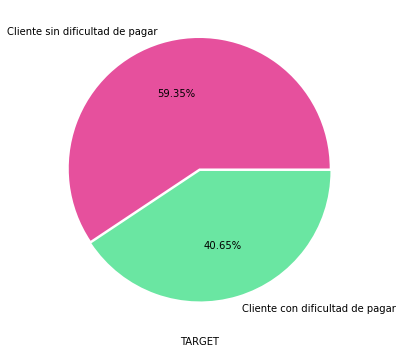

In [62]:
plt.figure(figsize=(10,6))
colors=['#E6509D',"#6AE6A2"]
plt.pie(sub['TARGET'].value_counts(),labels=['Cliente sin dificultad de pagar','Cliente con dificultad de pagar'],autopct='%.2f%%',explode=[0.01,0.01],colors=colors);
plt.xlabel('TARGET');

In [63]:
sub.to_csv(path+'submissionlrbl.csv', encoding='utf-8', index=False)